# **Chapter 3. Python 을 활용한 데이터 전처리** 





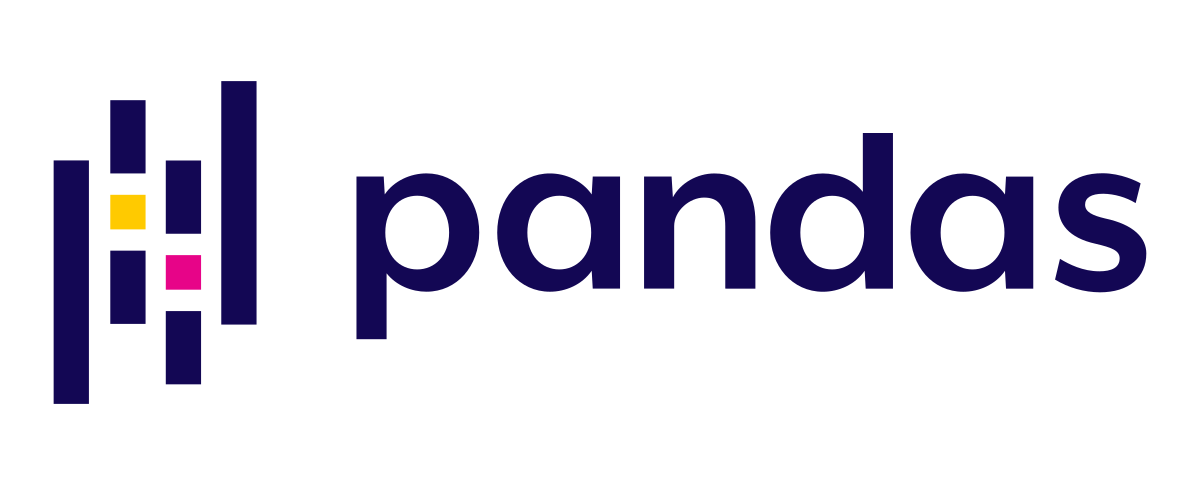


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> **3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기** <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-5. csv, excel 파일 읽기, 요약 정보 한눈에 확인하기

In [1]:
# 라이브러리 임포트
import pandas as pd

> ###  **3-5-1. 데이터 프레임 직접 만들기**
> - Pandas 는 **리스트(list)** 또는 **딕셔너리(dict)** 를 활용해서 **데이터 프레임 (`DataFrame`)** 을 직접 만들 수 있습니다
> - Pandas 데이터 프레임 (`DataFrame`) 은 **여러개의 (`Series`)** 로 이루어진 것 입니다
> <br>
>


> **리스트(list) 로 만들기**

In [2]:
mylist = [1,2,3,4]
mySeries = pd.Series(mylist)

In [3]:
type(mySeries)

pandas.core.series.Series

In [4]:
mylists = [['야구', '류현진', '22,300,000,000'],
           ['축구', '손흥민', '15,000,000,000'],
           ['롤', '페이커', '5,200,000,000']]
df = pd.DataFrame(mylists)
df

0    1               2
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

In [5]:
df = pd.DataFrame(mylists, columns=['종목', '이름', '연봉'])
df

종목   이름              연봉
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

> **딕셔너리(dict) 로 만들기**

In [6]:
mydict = {'종목': ['야구', '축구', '롤'],
          '이름': ['류현진', '손흥민', '페이커'],
          '연봉': ['22,300,000,000', '15,000,000,000', '5,200,000,000']}
df = pd.DataFrame(mydict)
df

종목   이름              연봉
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

> ### **3-5-2. csv 파일 읽고 쓰기**
> - `read_csv(파일 경로)` 명령어로 csv 파일을 읽어올 수 있습니다 <br>
> - `to_csv(파일 경로)` 명령어로 csv 파일을 저장할 수 있습니다 <br>
> - 실습 데이터 다운로드 : [kpop_idols.csv](https://docs.google.com/uc?export=download&id=1-2OsTtqS7Ci3uadVHFsPNbJZBNpevloi)
> <br>
>


ModuleNotFoundError: No module named 'google'

In [17]:
# csv 파일이 저장'된' 경로
csv_path = 'kpop_idols.csv'

In [19]:
# 파일 읽기
df = pd.read_csv(csv_path)

In [21]:
df.head(3) #위에서부터 몇개 볼 것인가

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN

In [24]:
# csv 파일을 저장'할' 경로
csv_path = 'kpop_idols(1).csv'

In [25]:
# 파일 저장
df.to_csv(csv_path)

> ###  **3-5-3. excel 파일 읽고 쓰기**
> - `read_excel(파일 경로)` 명령어로 엑셀 파일을 읽어올 수 있습니다 <br>
> - `to_excel(파일 경로)` 명령어로 엑셀 파일을 저장할 수 있습니다 <br>
> - 실습 데이터 다운로드 : [kpop_idos.xlsx](https://docs.google.com/uc?export=download&id=1--GDD-zqv7v2Gm0-1j7D_IA14wAtke58)
> <br>


In [26]:
# 엑셀 파일이 저장'된' 경로
excel_path = 'kpop_idols.xlsx'

In [27]:
# 파일 읽기
df = pd.read_excel(excel_path)

In [29]:
df.head(4)

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   
3  SNSD  South Korea            NaN     158      48        Incheon   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN  
3         NaN          NaN      F                    NaN   watasiwahyo     NaN

In [30]:
# 엑셀 파일을 저장'할' 경로
excel_path = 'kpop_idols(1).xlsx'

In [31]:
# 파일 저장
df.to_excel(excel_path)

> ### **3-5-4. 크롤링(crawling) 테이블 읽기**
> - Pandas 는 **웹사이트에서 테이블**을 **데이터 프레임 형태**로 가져올 수 있는 크롤링 기능도 제공합니다!
> 
> <br>
>


In [32]:
import requests as rq
site = 'https://dbkpop.com/db/all-k-pop-idols'
r = rq.get(site)

df = pd.read_html(r.text)[0]
df.columns = df.columns.get_level_values(0)

In [33]:
df.head()

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
4      NaN       Yuri      Kwon Yuri         권유리            유리    1989-12-05   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   
3  SNSD  South Korea            NaN     158      48        Incheon   
4  SNSD  South Korea            NaN     167      45         Goyang   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN  
3         NaN          NaN      F                    NaN   watasiwahyo     NaN  
4         NaN          NaN      F                    NaN       yulyulk     NaN

> ### **3-5-5. 요약 정보 확인하기**
> - `info()` 명령어로 한눈에 데이터 프레임의 **전체 행 (row) 수**, **컬럼 (column) 정보**, **Null (빈값)**, **DataType (데이터 타입)** 정보를 확인할 수 있습니다.
> <br>
>


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         500 non-null    object
 1   Stage Name      1860 non-null   object
 2   Full Name       1850 non-null   object
 3   Korean Name     1849 non-null   object
 4   K. Stage Name   1860 non-null   object
 5   Date of Birth   1860 non-null   object
 6   Group           1707 non-null   object
 7   Country         1860 non-null   object
 8   Second Country  66 non-null     object
 9   Height          1860 non-null   int64 
 10  Weight          1860 non-null   int64 
 11  Birthplace      882 non-null    object
 12  Other Group     140 non-null    object
 13  Former Group    283 non-null    object
 14  Gender          1860 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64